In [4]:
import numpy as np
import pandas as pd
from torch.nn.functional import softplus
from torch import Tensor
from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ls results/

losses_week1hour0_1.npy    weights_week1hour0_1.npy
losses_week1hour10_1.npy   weights_week1hour10_1.npy
losses_week1hour12_1.npy   weights_week1hour12_1.npy
losses_week1hour18_1.npy   weights_week1hour18_1.npy
losses_week1hour20_1.npy   weights_week1hour20_1.npy
losses_week1hour8_1.npy    weights_week1hour8_1.npy


In [157]:
df['start_y'].describe()

count    100000.000000
mean         12.444497
std           5.020897
min         -13.018718
25%           8.621817
50%          12.511303
75%          15.893565
max          39.781848
Name: start_y, dtype: float64

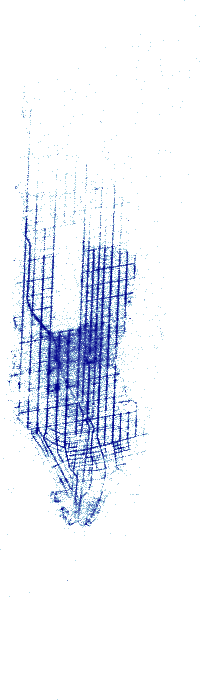

In [147]:
import datashader as ds
import datashader.transfer_functions as tf

cvs = ds.Canvas(plot_width=40*5, plot_height=140*5)
agg = cvs.points(df, 'start_x','start_y')
img = tf.shade(agg, cmap=['lightblue','darkblue'], how='eq_hist')
img

In [140]:
type(img.to_pil())

PIL.Image.Image

(array([ 122782.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   17218.]),
 array([  0.00000000e+00,   4.29331883e+08,   8.58663766e+08,
          1.28799565e+09,   1.71732753e+09,   2.14665941e+09,
          2.57599130e+09,   3.00532318e+09,   3.43465506e+09,
          3.86398695e+09,   4.29331883e+09]),
 <a list of 10 Patch objects>)

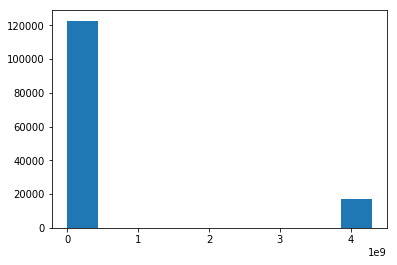

In [155]:
plt.hist(img.values.flatten())

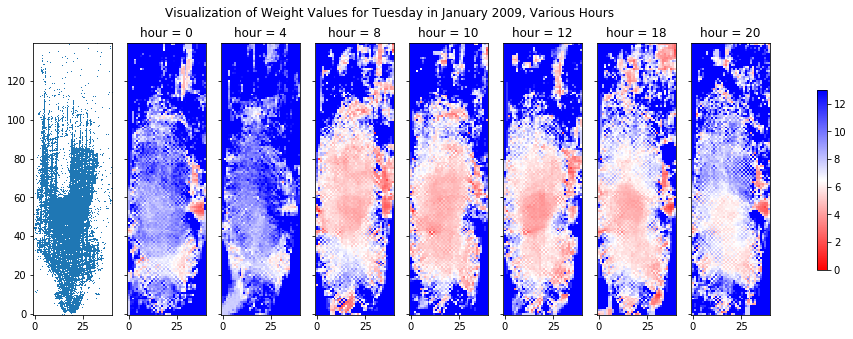

In [187]:
f, axes = plt.subplots(ncols=8, sharex=True, sharey=True, figsize=(13.2,5))
#axes[0].imshow(img.to_pil(),)
axes[0].plot(df['start_x']*4,df['start_y']*4, ',', ms=0.03,alpha=1)
for i, hour in enumerate([0, 4, 8, 10, 12, 18, 20]):
    weights = np.load('results/weights_week1hour{}_1.npy'.format(hour))
    
    x = axes[i+1].imshow(200 
                       / (0.01 + softplus(Variable(Tensor(weights))).data.numpy().T) 
                       * 0.682, 
                       origin='lower',
                       clim=(0,13), 
                       cmap='bwr_r')
    axes[i+1].set_title('hour = {}'.format(hour))
colorb_ax = f.add_axes((0.95,0.25,0.01,0.5))
f.colorbar(x, cax=colorb_ax)
plt.suptitle('Visualization of Weight Values for Tuesday in January 2009, Various Hours')
plt.savefig('heatmap_tuesdays.png', dpi=500)


In [169]:
chunks=  pd.read_csv('data/yellow_tripdata_2009-01_train_JC.csv',chunksize=100000)
df = next(chunks)

In [128]:
df['start_x'].describe(), df['start_y'].describe()

(count    100000.000000
 mean          4.313503
 std           1.839815
 min          -0.567542
 25%           2.810219
 50%           4.582829
 75%           5.722503
 max          12.132842
 Name: start_x, dtype: float64, count    100000.000000
 mean         12.444497
 std           5.020897
 min         -13.018718
 25%           8.621817
 50%          12.511303
 75%          15.893565
 max          39.781848
 Name: start_y, dtype: float64)

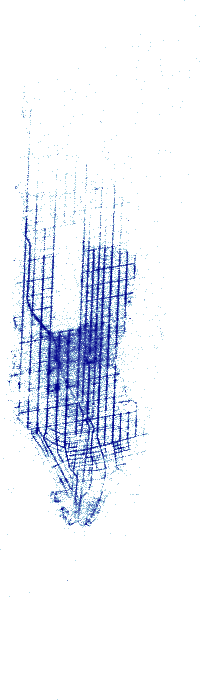

In [125]:

# pltplot(df['start_x'], df['start_y'],'.',alpha=0.1)
# plt.axis('equal')

In [100]:
%run utils.py

In [ ]:
rotate_manhattan